**Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Libraries**

In [ ]:
import os
import numpy as np
import pandas as pd

**Defining Paths and Categories**

In [ ]:
path = '/content/drive/My Drive/Brain_Tumor_Classification'
train = os.path.join(path, 'Training')
test = os.path.join(path, 'Testing')
categories = ["glioma", "meningioma", "notumor", "pituitary"]

**Collecting Image Paths and Labels**

In [ ]:
image_paths = []
labels = []

# Iterate through the categories in the Training and Testing folders
for data_type in [train, test]:
   for category in categories:
       category_path = os.path.join(data_type, category)
       if os.path.exists(category_path):  # Check if the category path exists
          for image_name in os.listdir(category_path):
              image_path = os.path.join(category_path, image_name)
              image_paths.append(image_path)
              labels.append(category)
       else:
            print(f"Directory not found: {category_path}")

#Creating a DataFrame
df = pd.DataFrame({
    "image_path": image_paths,
    "label": labels
})

In [ ]:
df.head()

,image_path,label
0,/content/drive/My Drive/Brain_Tumor_Classifica...,glioma
1,/content/drive/My Drive/Brain_Tumor_Classifica...,glioma
2,/content/drive/My Drive/Brain_Tumor_Classifica...,glioma
3,/content/drive/My Drive/Brain_Tumor_Classifica...,glioma
4,/content/drive/My Drive/Brain_Tumor_Classifica...,glioma


In [ ]:
df.tail()

,image_path,label
7018,/content/drive/My Drive/Brain_Tumor_Classifica...,pituitary
7019,/content/drive/My Drive/Brain_Tumor_Classifica...,pituitary
7020,/content/drive/My Drive/Brain_Tumor_Classifica...,pituitary
7021,/content/drive/My Drive/Brain_Tumor_Classifica...,pituitary
7022,/content/drive/My Drive/Brain_Tumor_Classifica...,pituitary


In [ ]:
df.shape

(7023, 2)

In [ ]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [ ]:
df['label'].unique()

array(['glioma', 'meningioma', 'notumor', 'pituitary'], dtype=object)

In [ ]:
df['label'].value_counts()

,count
label,
notumor,2000
pituitary,1757
meningioma,1645
glioma,1621


**Visualizing Dataset Distribution**

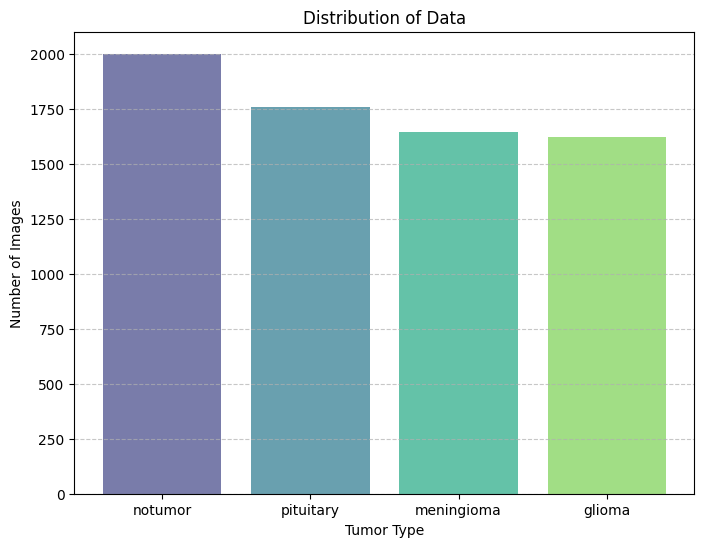

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of images per category
label_counts = df["label"].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values, color=sns.color_palette("viridis", len(label_counts)), alpha=0.7)
plt.title("Distribution of Data")
plt.xlabel("Tumor Type")
plt.ylabel("Number of Images")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

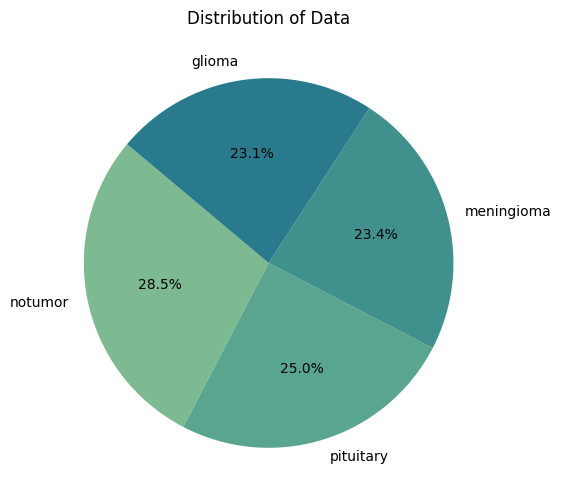

In [ ]:
label_counts = df['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("crest"))
plt.title("Distribution of Data")
plt.show()

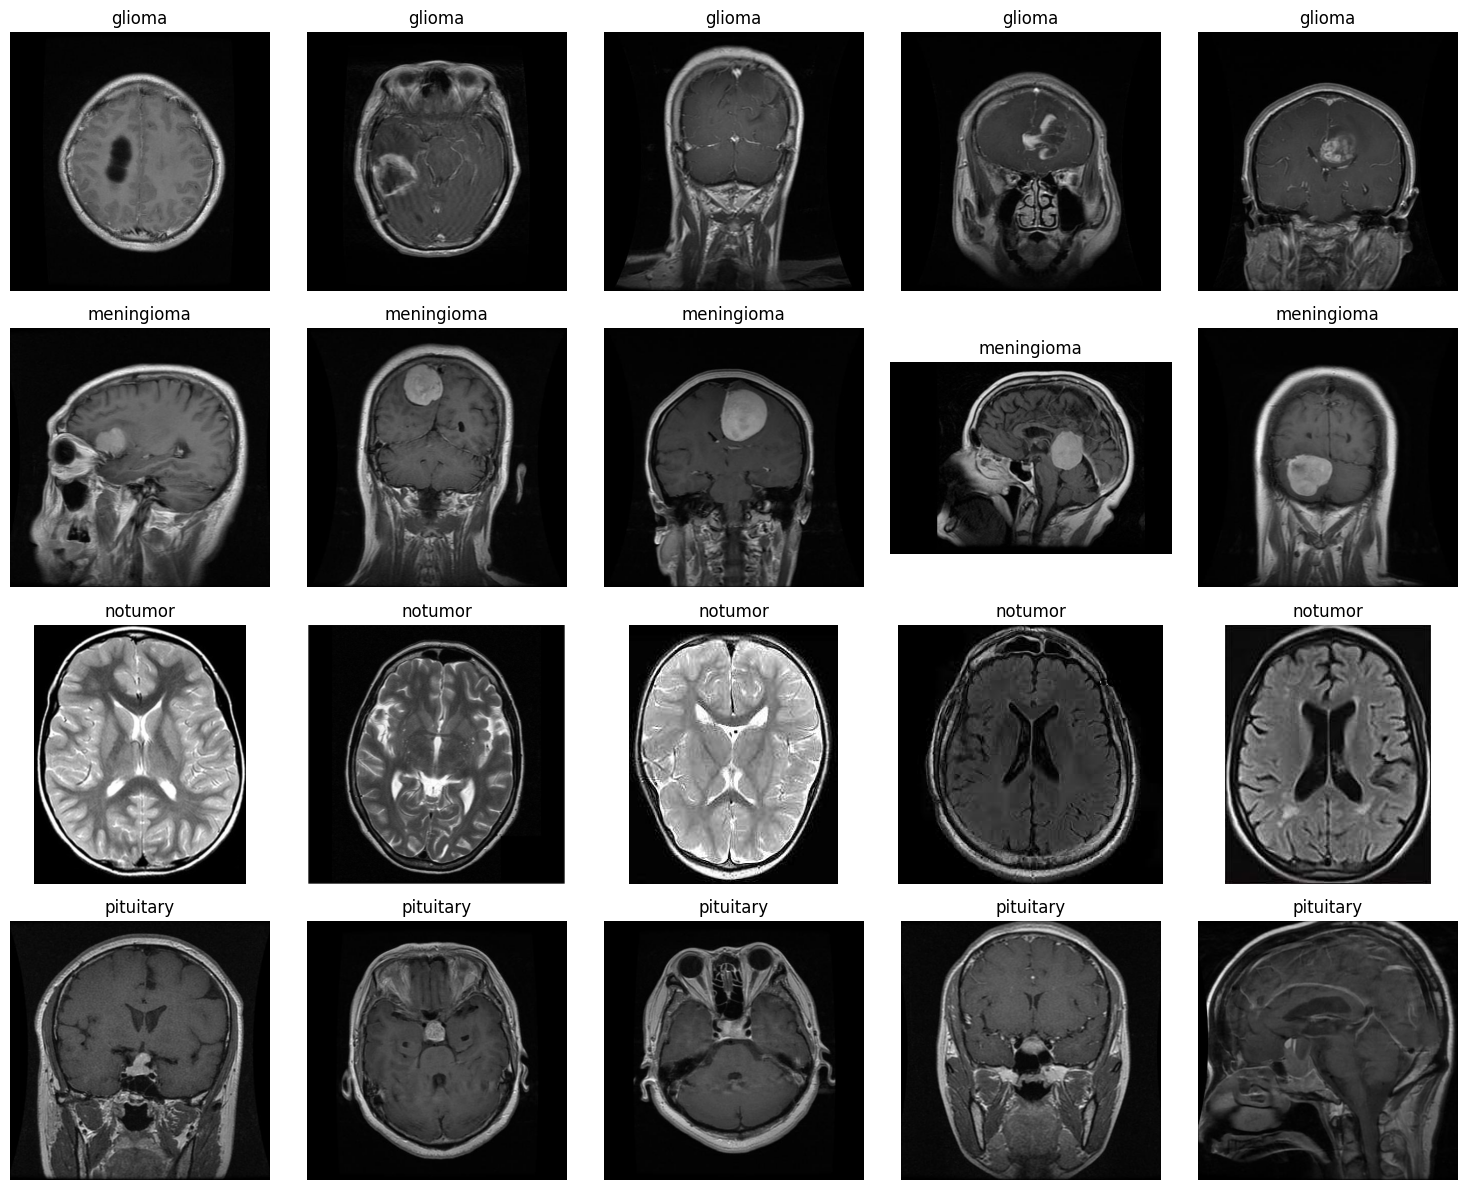

In [ ]:
import cv2
num_images = 5

plt.figure(figsize=(15, 12))

for i, category in enumerate(categories):
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images]

    for j, img_path in enumerate(category_images):

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(len(categories), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(category)

plt.tight_layout()
plt.show()

**Category Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['category_encoded'] = label_encoder.fit_transform(df['label'])

In [ ]:
df = df[['image_path', 'category_encoded']]

In [ ]:
# Display the mapping of categories to encoded labels
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Category Encoding Mapping:")
for category, encoded_value in category_mapping.items():
    print(f"{category}: {encoded_value}")

Category Encoding Mapping:
glioma: 0
meningioma: 1
notumor: 2
pituitary: 3


**Oversampling the Data**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['category_encoded'])

In [ ]:
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['category_encoded'] = y_resampled

In [ ]:
print("\nClass distribution after oversampling:")
df_resampled['category_encoded'].value_counts()


Class distribution after oversampling:


,count
category_encoded,
0,2000
1,2000
2,2000
3,2000


In [ ]:
df_resampled

,image_path,category_encoded
0,/content/drive/My Drive/Brain_Tumor_Classifica...,0
1,/content/drive/My Drive/Brain_Tumor_Classifica...,0
2,/content/drive/My Drive/Brain_Tumor_Classifica...,0
3,/content/drive/My Drive/Brain_Tumor_Classifica...,0
4,/content/drive/My Drive/Brain_Tumor_Classifica...,0
...,...,...
7995,/content/drive/My Drive/Brain_Tumor_Classifica...,3
7996,/content/drive/My Drive/Brain_Tumor_Classifica...,3
7997,/content/drive/My Drive/Brain_Tumor_Classifica...,3
7998,/content/drive/My Drive/Brain_Tumor_Classifica...,3


In [ ]:
import time
import shutil
import pathlib
import itertools
from PIL import Image

import cv2
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [ ]:
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)

**Train, Validation, and Test Splits**

In [ ]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,
    shuffle=True,
    random_state=42,
    stratify=df_resampled['category_encoded']
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['category_encoded']
)

**Image Generators**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path',
    y_col='category_encoded',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)

Found 6400 validated image filenames belonging to 4 classes.
Found 800 validated image filenames belonging to 4 classes.
Found 800 validated image filenames belonging to 4 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

**Building the VGG16 Model**

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, Dropout, BatchNormalization,
                                     GaussianNoise, Input, MultiHeadAttention, Reshape)
from tensorflow.keras.optimizers import Adam

def create_vgg16_model(input_shape):

    inputs = Input(shape=input_shape)

    base_model = VGG16(weights='imagenet', input_tensor=inputs, include_top=False)

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 512
    x = Reshape((height * width, channels))(x)

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)
    attention_output = Reshape((height, width, channels))(attention_output)

    x = GaussianNoise(0.25)(attention_output)

    x = GlobalAveragePooling2D()(x)

    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)

    outputs = Dense(4, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)

cnn_model = create_vgg16_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Training the Model**

In [ ]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=5,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 2174s 5s/step - accuracy: 0.7419 - loss: 0.6714 - val_accuracy: 0.6888 - val_loss: 0.8618
Epoch 2/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 43s 105ms/step - accuracy: 0.8741 - loss: 0.3561 - val_accuracy: 0.7125 - val_loss: 1.2080
Epoch 3/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 81s 104ms/step - accuracy: 0.8996 - loss: 0.2759 - val_accuracy: 0.8763 - val_loss: 0.3401
Epoch 4/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 82s 103ms/step - accuracy: 0.9246 - loss: 0.2113 - val_accuracy: 0.8525 - val_loss: 0.4540
Epoch 5/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 43s 105ms/step - accuracy: 0.9423 - loss: 0.1770 - val_accuracy: 0.7688 - val_loss: 0.7828


**Evaluating and Visualizing the Model**

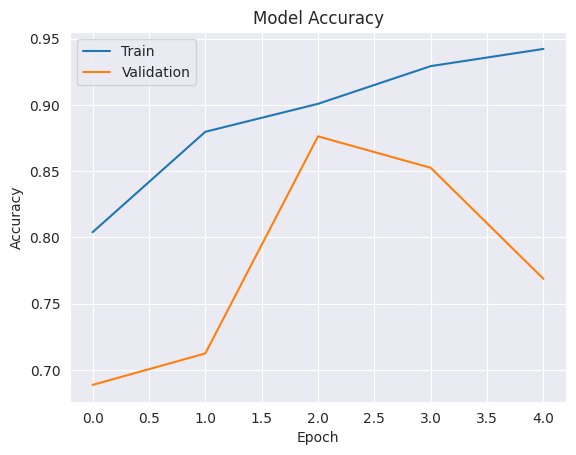

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

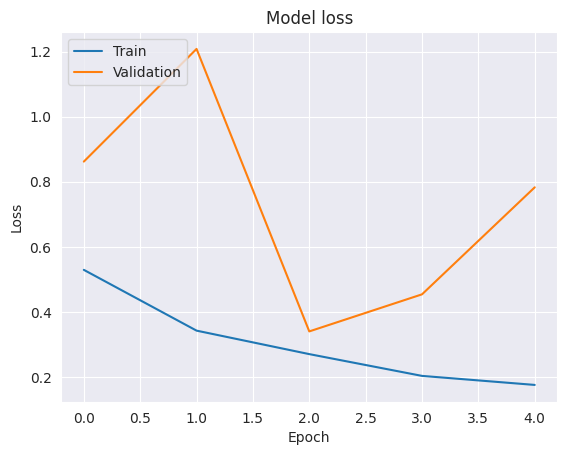

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
predicted_classes = np.argmax(predictions, axis=1)

50/50 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step


**Generating Classification Report**

In [ ]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       200
           1       0.85      0.85      0.85       200
           2       1.00      0.88      0.94       200
           3       0.93      0.96      0.95       200

    accuracy                           0.90       800
   macro avg       0.91      0.90      0.90       800
weighted avg       0.91      0.90      0.90       800



**Confusion Matrix Visualization**

In [ ]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

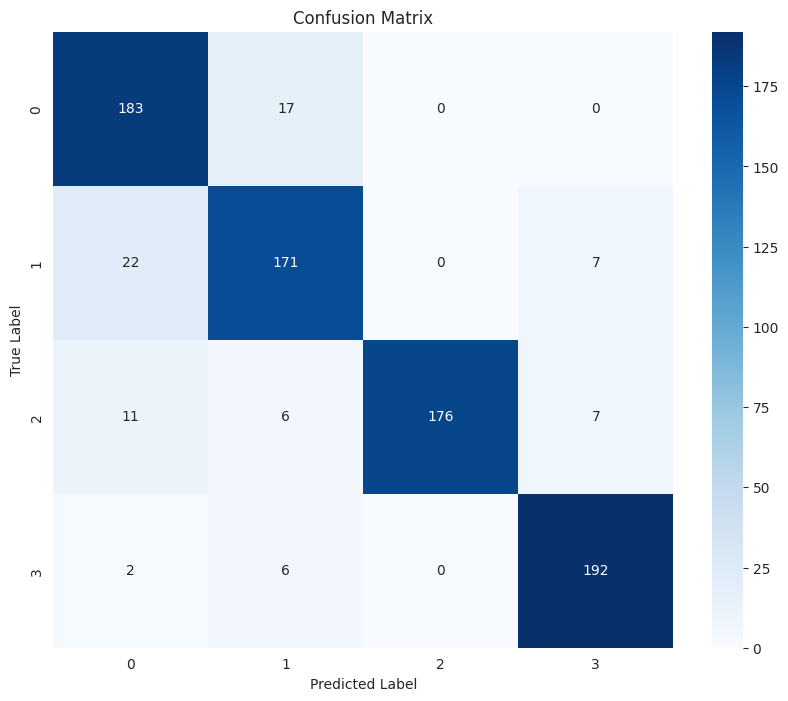

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()